 1.1 Cargar el archivo como un DataFrame

In [3]:
import pandas as pd

df = pd.read_csv('Airbnb-Milan.csv')


1.1 Crear un nuevo DataFrame con las columnas específicas


In [18]:
selected_columns = ["host_is_superhost", "host_identity_verified", "bathrooms", "bedrooms",
                    "daily_price", "minimum_nights", "number_of_reviews",
                    "review_scores_rating"]
df_filtered = df[selected_columns]
print(df.describe())


        Unnamed: 0            id       host_id  host_location  \
count  9005.000000  9.005000e+03  9.005000e+03    9005.000000   
mean   4661.490616  1.931042e+07  6.777267e+07       0.960244   
std    2691.875576  1.077793e+07  7.743693e+07       0.195396   
min       1.000000  2.398600e+04  2.405400e+04       0.000000   
25%    2332.000000  8.718356e+06  1.022457e+07       1.000000   
50%    4650.000000  2.107205e+07  2.881247e+07       1.000000   
75%    6994.000000  2.915264e+07  1.153041e+08       1.000000   
max    9322.000000  3.646365e+07  2.726798e+08       1.000000   

       host_response_time  host_response_rate  host_total_listings_count  \
count         9005.000000         9005.000000                9005.000000   
mean             0.872404           53.273959                  20.407773   
std              0.333658           10.314895                  85.866249   
min              0.000000            1.000000                   0.000000   
25%              1.000000         

1.2 Cambiar los factores de la variable "host_is_superhost"

In [19]:
df['host_is_superhost'].replace({0: 'NO', 1: 'SI'}, inplace=True)
print(df)
print(df.describe())


      Unnamed: 0        id    host_id  host_location  host_response_time  \
0              1     73892     387110              1                   1   
1              2     74169     268127              1                   1   
2              3     77958     387110              1                   1   
3              4     93025     499743              1                   1   
6              7    233795    1224206              1                   1   
...          ...       ...        ...            ...                 ...   
9317        9318  35954783   56584596              1                   1   
9318        9319  36023503  271013325              1                   1   
9319        9320  36071908  271354203              1                   0   
9320        9321  36305676  171239896              1                   1   
9321        9322  36463651  174590119              1                   1   

      host_response_rate host_is_superhost  host_total_listings_count  \
0             

1.3 Cambiar los factores de la variable "host_identity_verified"






In [20]:
df['host_identity_verified'] = df['host_identity_verified'].replace({0: "NO VERIFICA", 1: "VERIFICA"})
print(df)
print(df.describe())


      Unnamed: 0        id    host_id  host_location  host_response_time  \
0              1     73892     387110              1                   1   
1              2     74169     268127              1                   1   
2              3     77958     387110              1                   1   
3              4     93025     499743              1                   1   
6              7    233795    1224206              1                   1   
...          ...       ...        ...            ...                 ...   
9317        9318  35954783   56584596              1                   1   
9318        9319  36023503  271013325              1                   1   
9319        9320  36071908  271354203              1                   0   
9320        9321  36305676  171239896              1                   1   
9321        9322  36463651  174590119              1                   1   

      host_response_rate host_is_superhost  host_total_listings_count  \
0             

 1.4 Mostrar un resumen estadístico de los datos


In [7]:
summary_stats = df_filtered.describe()
print(summary_stats)


       host_is_superhost  host_identity_verified    bathrooms     bedrooms  \
count        9322.000000             9322.000000  9322.000000  9322.000000   
mean            0.288887                0.431238     3.356790     1.218086   
std             0.453269                0.495276     0.979969     0.731942   
min             0.000000                0.000000     1.000000     0.000000   
25%             0.000000                0.000000     3.000000     1.000000   
50%             0.000000                0.000000     3.000000     1.000000   
75%             1.000000                1.000000     3.000000     2.000000   
max             1.000000                1.000000    17.000000    10.000000   

       daily_price  minimum_nights  number_of_reviews  review_scores_rating  
count  9322.000000     9322.000000        9322.000000           9322.000000  
mean    103.735143        3.205321          39.640742             93.147930  
std     137.956457       13.749608          65.597271          

1.5  Filtrar el dataset por mínimo de noches igual o menor que siete


In [8]:
df = df[df['minimum_nights'] <= 7]
print(df)

      Unnamed: 0        id    host_id  host_location  host_response_time  \
0              1     73892     387110              1                   1   
1              2     74169     268127              1                   1   
2              3     77958     387110              1                   1   
3              4     93025     499743              1                   1   
6              7    233795    1224206              1                   1   
...          ...       ...        ...            ...                 ...   
9317        9318  35954783   56584596              1                   1   
9318        9319  36023503  271013325              1                   1   
9319        9320  36071908  271354203              1                   0   
9320        9321  36305676  171239896              1                   1   
9321        9322  36463651  174590119              1                   1   

      host_response_rate host_is_superhost  host_total_listings_count  \
0             

1.6 Calcular el precio promedio por día en función de la verificación del perfil


In [9]:
average_price_by_verification = df.groupby('host_identity_verified')['daily_price'].mean()
print(average_price_by_verification)


host_identity_verified
NO VERIFICA    103.751725
VERIFICA       103.897598
Name: daily_price, dtype: float64



1.7 Quien tiene un mayor número de reseñas, un super host o un no super host


In [11]:
superhost_reviews = df_filtered[df_filtered['host_is_superhost'] == 'SI']['number_of_reviews'].sum()
non_superhost_reviews = df_filtered[df_filtered['host_is_superhost'] == 'NO']['number_of_reviews'].sum()

if superhost_reviews > non_superhost_reviews:
    print("Los super hosts tienen un mayor número de reseñas.")
elif superhost_reviews < non_superhost_reviews:
    print("Los no super hosts tienen un mayor número de reseñas.")
else:
    print("Tanto los super hosts como los no super hosts tienen el mismo número de reseñas.")


Tanto los super hosts como los no super hosts tienen el mismo número de reseñas.


1.8 Sobre la estadística anterior, ¿quién tiene la puntuación media más alta?


In [12]:
superhost_mean_rating = df_filtered[df_filtered['host_is_superhost'] == 'SI']['review_scores_rating'].mean()
non_superhost_mean_rating = df_filtered[df_filtered['host_is_superhost'] == 'NO']['review_scores_rating'].mean()

print(superhost_mean_rating)
print(non_superhost_mean_rating)


if superhost_reviews > non_superhost_reviews:
    print("Los super hosts tienen un mayor número de reseñas.")
elif superhost_reviews < non_superhost_reviews:
    print("Los no super hosts tienen un mayor número de reseñas.")
else:
    print("Tanto los super hosts como los no super hosts tienen el mismo número de reseñas.")

nan
nan
Tanto los super hosts como los no super hosts tienen el mismo número de reseñas.


1.9 Crea un vector categórico llamado “CATEGORÍA” en función de la puntuación de las reseñas


In [24]:
df_filtered['CATEGORÍA'] = pd.cut(df_filtered['review_scores_rating'], bins=[0, 49, 75, 100],
                                  labels=['NO ACONSEJABLE', 'ESTÁNDAR', 'TOP'])
print(df_filtered['CATEGORÍA'])

0       TOP
1       TOP
2       TOP
3       TOP
6       TOP
       ... 
9317    TOP
9318    TOP
9319    TOP
9320    TOP
9321    TOP
Name: CATEGORÍA, Length: 9005, dtype: category
Categories (3, object): ['NO ACONSEJABLE' < 'ESTÁNDAR' < 'TOP']


/tmp/ipykernel_26799/505604872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CATEGORÍA'] = pd.cut(df_filtered['review_scores_rating'], bins=[0, 49, 75, 100],


In [25]:
# 12 Crea un vector categórico llamado “CATEGORÍA”, en función de que, si para la puntuación de las reseñas tiene de 0 a 49, sea "NO ACONSEJABLE"; de 50 a 75 sea “ESTÁNDAR”; y de 76 a 100 sea “TOP”.
df["CATEGORÍA"] = pd.cut(df["review_scores_rating"], bins=[
                          0, 49, 75, 100], labels=["NO ACONSEJABLE", "ESTÁNDAR", "TOP"])
df.head()
print(df.shape)

(9005, 62)



1.10 Mostrar las frecuencias de la variable "CATEGORÍA"


In [26]:
categoria_frequencies = df_filtered['CATEGORÍA'].value_counts()
print(categoria_frequencies)


CATEGORÍA
TOP               8717
ESTÁNDAR           251
NO ACONSEJABLE      37
Name: count, dtype: int64


1.11 Obtener el histograma del precio por día


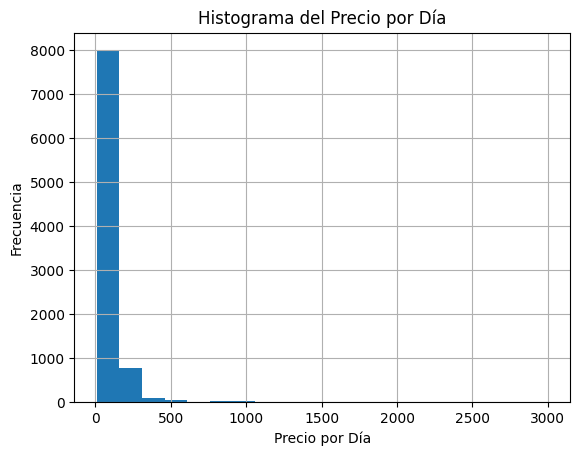

In [27]:
import matplotlib.pyplot as plt

df_filtered['daily_price'].hist(bins=20)
plt.xlabel('Precio por Día')
plt.ylabel('Frecuencia')
plt.title('Histograma del Precio por Día')
plt.show()

/tmp/ipykernel_26799/2625361219.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_filtered["daily_price"], bins=20, color="green")


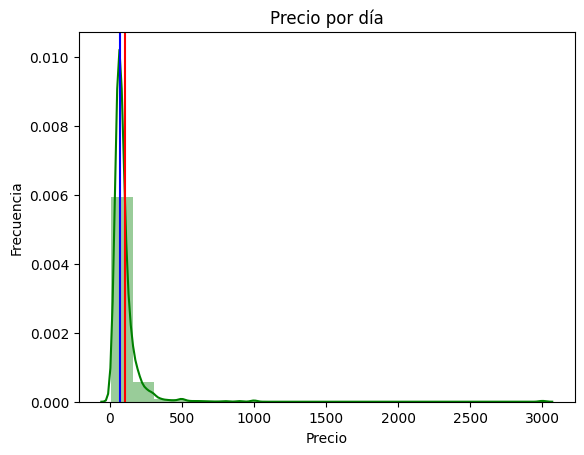

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(df_filtered["daily_price"], bins=20, color="green")
plt.title("Precio por día")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.axvline(df_filtered["daily_price"].mean(), color="red")
plt.axvline(df_filtered["daily_price"].median(), color="blue")
plt.show()
